<a href="https://colab.research.google.com/github/OhOmah/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [5]:
# Importing the libaries I need to analyze the dataframe 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt 

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [6]:
df.tail()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
2756,86961,No,"Not employed, and not looking for work","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",9-11 years,9-11 years,180000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;Python;Ruby;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Middle Eastern
2757,87004,"Yes, full-time","Not employed, and not looking for work","Another engineering discipline (ex. civil, ele...",Full-stack developer;Student,3-5 years,0-2 years,36716.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;PHP;SQL;TypeScript;Delphi/Object...,Male,25 - 34 years old,White or of European descent
2758,87054,"Yes, part-time","Not employed, but looking for work","Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,0-2 years,3-5 years,2904.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
2760,87131,"Yes, full-time","Not employed, but looking for work","Computer science, computer engineering, or sof...",Back-end developer;QA or test developer,0-2 years,0-2 years,1332.0,Taken an online course in programming or softw...,Online developer communities other than Stack ...,I haven’t gotten a developer job,C++;Hack;Python;HTML;CSS,Male,18 - 24 years old,Middle Eastern


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [8]:
# Grabbing the sample size of 20
sample = df.sample(20, random_state=42)
sample.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


In [10]:
# Grabbing the sample size of 200

sample_large = df.sample(200, random_state=42)
sample_large.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [11]:
# Getting the sample mean of the sample size of 20

sample['ConvertedSalary'].mean()

55752.2

In [12]:
# Getting the sample mean of the sample size of 200 

sample_large['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

With a larger sample size, it is easier for me to trust the sample mean from the larger sample group. Since it allows more of the population to be accounted for it will make the margain of error (moe) and standard deviation much lower than the smaller sample group. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

The difference between the point estimates for my smaller sample and larger sample is telling me that just maybe the sampling error for my smaller sample set has a wider margain of error than the larger sample set 


**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



A great way to report these numbers so readers can can get an idea about how far off our estimates might be due to sampling error would be having graphs with Confidence intervals 

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [16]:
# Making the confidence interval function. 
import numpy as np

def confidence_interval(sample, confidence_level=.95):
  # Turning the dataframe back into a Numpy array to keep it consistant 
  data = np.array(sample)

  # Now defining the values to get the sample standard deviation 
  s = np.std(data, ddof=1)
  # The Sample size (n)
  n = data.shape[0]
  # The Sample Data (x_bar)
  x_bar = np.mean(data)

  # Looking up the t statistic that corresponds to our sample size and confidence level 
  t = stats.t.ppf(1 - ((1 - confidence_level) / 2), n-1)

  # Getting the Standard Error 
  std_err = s / np.sqrt(n)

  # Getting the margin of error
  moe = t*std_err 

  # Now with that information defined I can get the lower bownd and upper bound values 

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is wider than the larger sample set. Because of the larger sample accounting for 10x the amount of values in the sample set. With a smaller data set it is harder to confidently say the values represent the population values. 

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [23]:
# Now testing the confidence interval for the sample size of 20 with a confidence level of 95%

CI = confidence_interval(sample['ConvertedSalary'])
CI

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [24]:
# Testing the confidence interval for the sample size of 200

CI1 = confidence_interval(sample_large['ConvertedSalary'])
CI1

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

The margin of error gives an idea of how far off our estimates might be ( with a confidence level of 95% of course). 

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

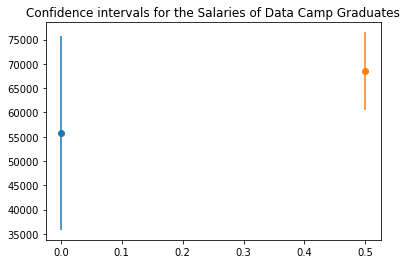

In [26]:
# Creating a error bar to compare my smaller sample size and larger sample size 

plt.errorbar(0, CI[1], yerr=CI[3], fmt='o')
plt.errorbar(.5, CI1[1], yerr=CI1[3], fmt='o')
plt.title('Confidence intervals for the Salaries of Data Camp Graduates')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

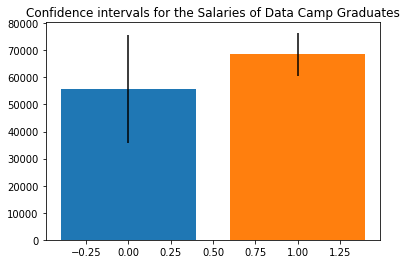

In [28]:
plt.bar(0, height=CI[1], yerr=CI[3])
plt.bar(1, height=CI1[1], yerr=CI1[3])
plt.title('Confidence intervals for the Salaries of Data Camp Graduates')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [20]:
confidence_interval(df['ConvertedSalary'])

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision compared to accuracy in the context of statistical estimates 

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.